In [ ]:
#Problem-1
#Data Exploration and Understanding:
#Dataset Overview:
#1.Load the dataset and display the first 10 rows.
import matplotlib.pyplot as plt
import pandas as pd
reader = pd.read_csv("/content/drive/MyDrive/Assesment-1/WHR-2024-5CS037.csv")
df = pd.DataFrame(reader)
# print(data_frame.head(10))
df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [ ]:
# 2. Identify the number of rows and columns in the dataset.
rows,columns =df.shape
print(f"Rows:{rows} Columns:{columns}")

Rows:143 Columns:9


In [ ]:
# 3. List all the columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [ ]:
# Basic Statistics:
# 1. Calculate the mean, median, and standard deviation for the Score column.

score_mean = df['score'].mean()
score_median = df['score'].median()
std_dev =df['score'].std()
print(f"Mean:{score_mean},Median:{score_median},Standard deviation:{std_dev}")

Mean:5.52758041958042,Median:5.785,Standard deviation:1.1707165099442995


In [ ]:
# 2. Identify the country with the highest and lowest happiness scores.

highest_score = df['score'].max()
lowest_score = df['score'].min()
country_highest = df.loc[df['score'].idxmax(),'Country name']
country_lowest = df.loc[df['score'].idxmin(),'Country name']
country_highest,country_lowest

('Finland', 'Afghanistan')

In [ ]:
# Missing Values:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column
null_values = df.isnull().sum()
print(null_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# Filtering and Sorting:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.

filtered_score = df[df['score']>=7.5]
filtered_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
# top 10 rows.
filtered_score = df[df['score']>=7.5]
sorted_gdp = filtered_score.sort_values('Log GDP per capita', ascending=False)
top_10_countries = sorted_gdp.head()
top_10_countries

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
# • Adding New Columns:
# 1. Create a new column called Happiness Category that categorizes countries into three categories
# based on their Score:
# Low − (Score < 4)
# Medium − (4 ≤ Score ≤ 6)
# High − (Score > 6)
def category(score):
    if score <4:
        return 'Low'
    elif score <=6:
        return 'Medium'
    else:
        return 'High'

df['Happiness_Category']=df['score'].apply(category)
count = df['Happiness_Category'].value_counts()
count

,count
Happiness_Category,
Medium,70
High,56
Low,17


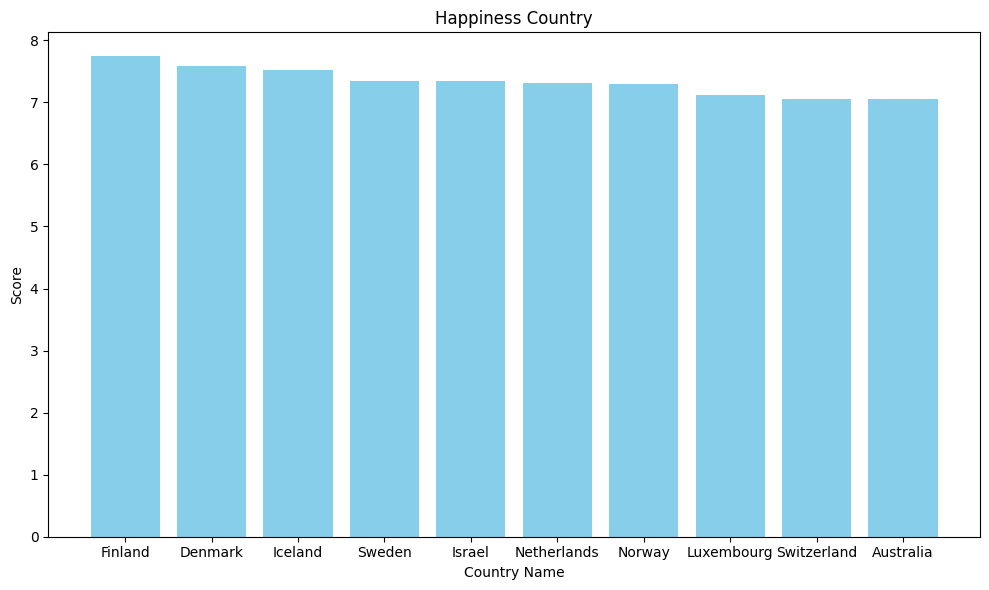

In [ ]:
# 2. Data Visualizations:
# • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
import matplotlib.pyplot as plt
score_10 = df.sort_values('score', ascending= False)
top_10 = score_10.head(10)
plt.figure(figsize=(10,6))
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.bar(top_10['Country name'],top_10['score'],color ='skyblue')
plt.title("Happiness Country")
plt.tight_layout()
plt.show()


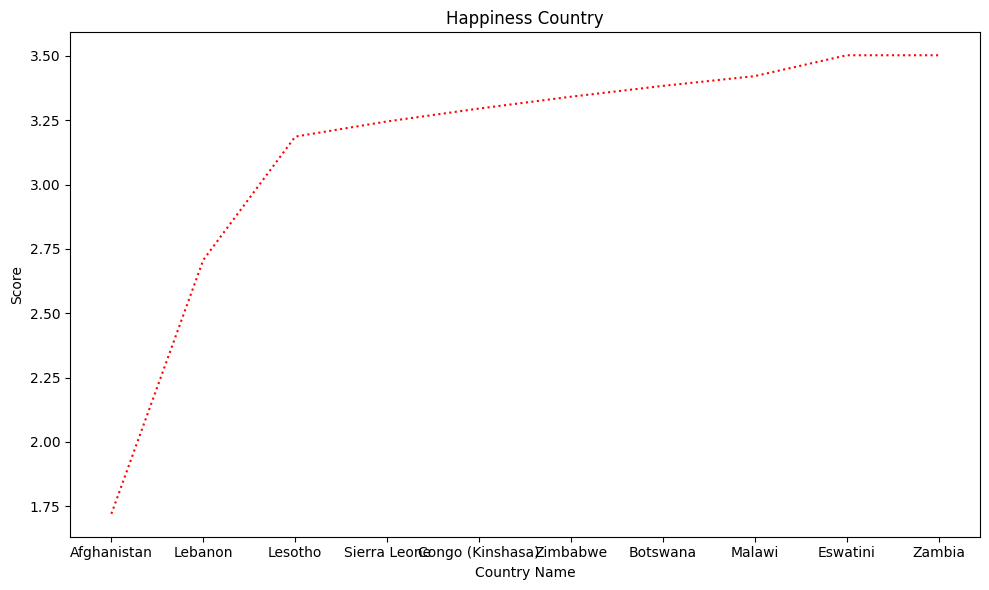

In [ ]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

top_10_unhappiest = df.sort_values('score',ascending=True)
top_10 = top_10_unhappiest.head(10)
plt.figure(figsize=(10,6))
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.plot(top_10['Country name'],top_10['score'],color ='red',ls=':')
plt.title("Happiness Country")
plt.tight_layout()
plt.show()


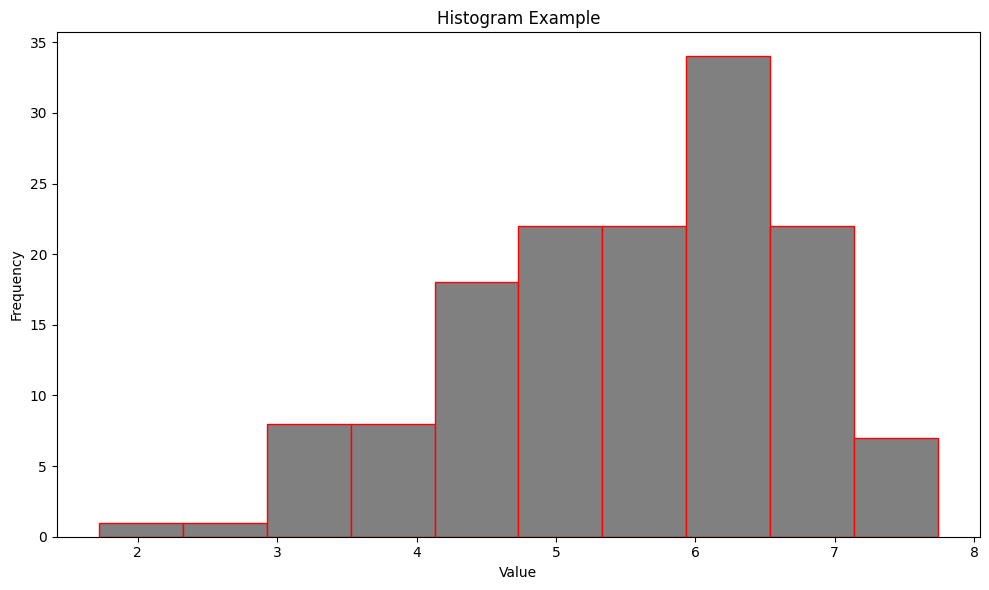

In [ ]:
# Plot a histogram for the Score column to show its distribution and also interpret.
data_frame = pd.DataFrame(reader)
plt.figure(figsize=(10, 6))
plt.hist(data_frame['score'] ,bins=10, color='grey', edgecolor='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.tight_layout()
plt.show()


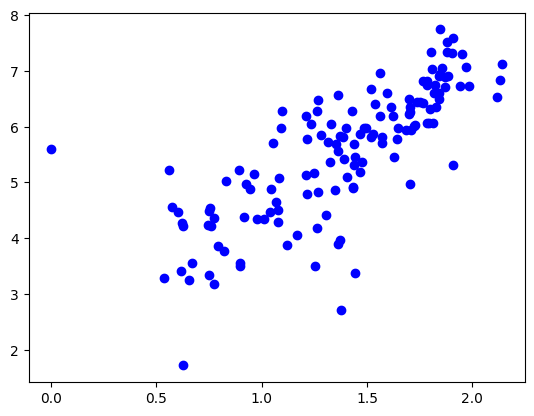

In [ ]:
# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
gdp = df['Log GDP per capita']
scr = df['score']
plt.scatter(x=gdp,y=scr,color="blue",marker = 'o')
plt.show()

In [ ]:
#Problem - 2 - Some Advance Data Exploration Task:
#Task - 1 - Setup Task - Preparing the South-Asia Dataset:
#Steps:
#1. Define the countries in South Asia with a list for example:
#south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
#"Maldives", "Nepal", "Pakistan", "Srilanka"]

# Filter the dataset for South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
filtered_data = df[df['Country name'].isin(south_asian_countries)]
filtered_data.to_csv('C:\\Users\\user\\Desktop\\filtered.csv',index = False)



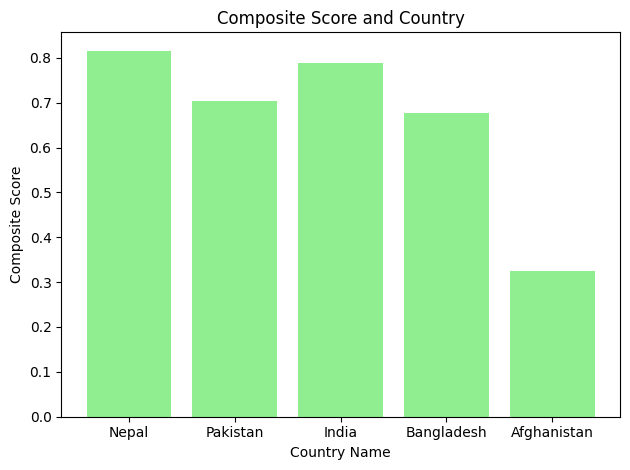

In [ ]:
#Task - 2 - Composite Score Ranking:
#Tasks:
#1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:
#Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
# Create a new column 'Composite Score' using the given formula

import pandas as pd
import matplotlib.pyplot as plt
reader = pd.read_csv("C:\\Users\\user\\Desktop\\filtered.csv")
South_Asia = pd.DataFrame(reader)
South_Asia["Composite Score"]=0.40*South_Asia['Log GDP per capita']+0.30*South_Asia['Social support']+0.30*South_Asia['Healthy life expectancy']
South_Asia.sort_values(by='Composite Score', ascending=False)
top_5=South_Asia.head()
x=top_5['Country name']
y=top_5['Composite Score']
x,y
plt.xlabel("Country Name")
plt.ylabel("Composite Score")
plt.bar(x,y,color='lightgreen')
plt.title("Composite Score and Country")
plt.tight_layout()
plt.show()

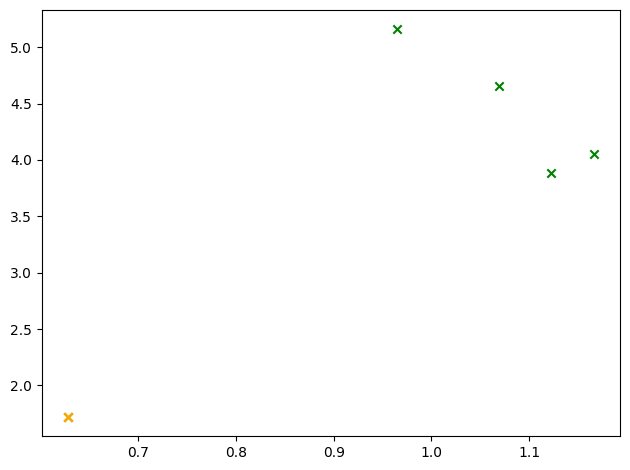

In [ ]:
#Task - 3 - Outlier Detection:
#Tasks:
#1. Identify outlier countries in South Asia based on their Score and GDP per Capita
gdp = South_Asia['Log GDP per capita']
scr= South_Asia['score']

#2. Define outliers using the 1.5 × IQR rule.
def outliers(col_name):
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col_name < lower_bound) | (col_name > upper_bound)

# Identify outliers for GDP and Score
outliers_gdp =outliers(gdp)
outliers_scr =outliers(scr)
South_Asia['Is outlier'] = outliers_gdp|outliers_scr
South_Asia[South_Asia['Is outlier']]

# Task 3: Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis
# Highlight outliers in a different color
x=gdp
y=scr
plt.scatter(x,y,color="green",marker='x')
plt.scatter(South_Asia[outliers_gdp]['Log GDP per capita'], South_Asia[outliers_gdp]['score'],
            c='orange',label='GDP Outliers',marker='x')
plt.scatter(South_Asia[outliers_scr]['Log GDP per capita'], South_Asia[outliers_scr]['score'],
            c='orange',label='Score Outliers',marker='x')
plt.tight_layout()
plt.show()

# Task 4: Discuss the characteristics of outliers
# Outliers may indicate extreme values in GDP per Capita or Score, potentially skewing regional averages.
# These outliers can impact the interpretation of the dataset by disproportionately influencing summary statistics.

In [ ]:
#Task - 4 - Exploring Trends Across Metrics:
#Tasks:
#1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Example data for South Asian countries
countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Afghanistan']
freedom_to_make_life_choices = [0.45, 0.50, 0.42, 0.60, 0.47, 0.35]  # Hypothetical values
generosity = [0.25, 0.30, 0.28, 0.35, 0.32, 0.20]  # Hypothetical values
scores = [5.5, 4.7, 5.2, 6.1, 5.0, 3.8]  # Hypothetical scores (could be a Happiness Score, for example)

# Create a DataFrame
data = pd.DataFrame({
    'Country': countries,
    'Freedom to Make Life Choices': freedom_to_make_life_choices,
    'Generosity': generosity,
    'Score': scores
})

# Calculate Pearson correlation between 'Freedom to Make Life Choices' and 'Score'
freedom_corr, _ = pearsonr(data['Freedom to Make Life Choices'], data['Score'])

# Calculate Pearson correlation between 'Generosity' and 'Score'
generosity_corr, _ = pearsonr(data['Generosity'], data['Score'])

# Display the results
print(f"Pearson Correlation between 'Freedom to Make Life Choices' and 'Score': {freedom_corr:.3f}")
print(f"Pearson Correlation between 'Generosity' and 'Score': {generosity_corr:.3f}")



Pearson Correlation between 'Freedom to Make Life Choices' and 'Score': 0.799
Pearson Correlation between 'Generosity' and 'Score': 0.731


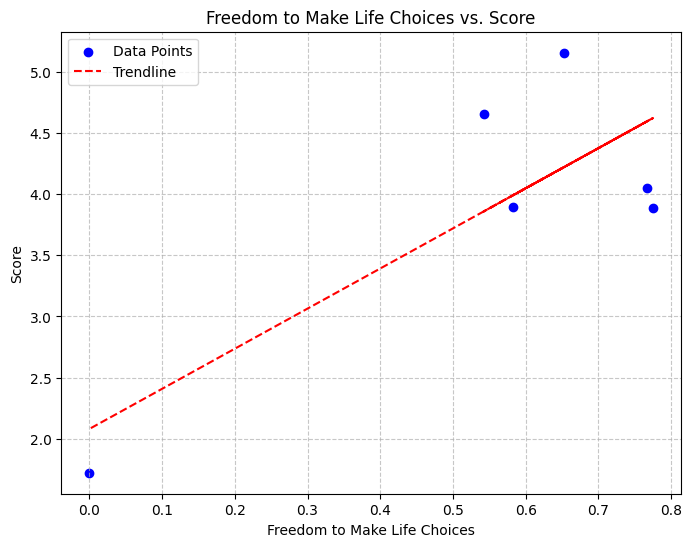

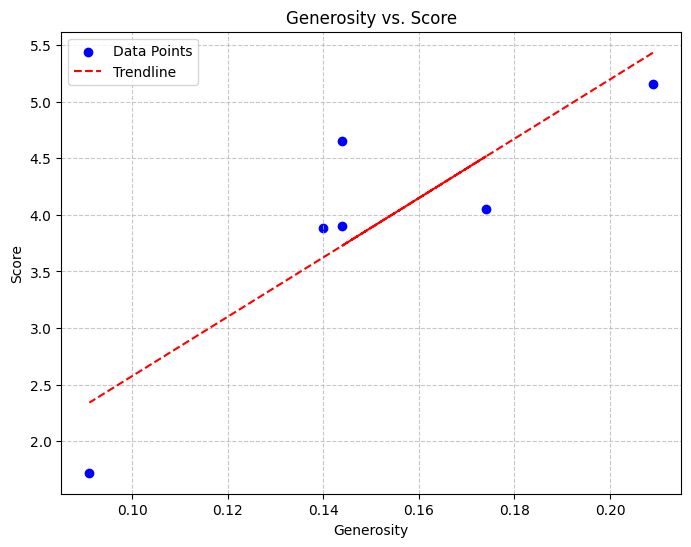

In [ ]:
#2. Create scatter plots with trendlines for these metrics against the Score.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/Assignment-1/WHR-2024-5CS037.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Filter South Asian countries
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asia_data = data[data['Country name'].isin(south_asian_countries)][[
    'Country name', 'score', 'Freedom to make life choices', 'Generosity'
]]

# Function to plot scatter with trendline
def plot_trendline(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Data Points')

    # Fit a linear trendline
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red', linestyle='--', label='Trendline')

    # Customize plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# Plot scatter with trendlines
plot_trendline(
    south_asia_data['Freedom to make life choices'],
    south_asia_data['score'],
    'Freedom to Make Life Choices',
    'Score',
    'Freedom to Make Life Choices vs. Score'
)

plot_trendline(
    south_asia_data['Generosity'],
    south_asia_data['score'],
    'Generosity',
    'Score',
    'Generosity vs. Score'
)



In [ ]:
#3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.
# Calculate Pearson correlation
correlations = south_asia_data[['score', 'Freedom to make life choices', 'Generosity']].corr(method='pearson')

# Extract relevant correlations
freedom_corr = correlations.loc['score', 'Freedom to make life choices']
generosity_corr = correlations.loc['score', 'Generosity']

# Print results
print(f"Pearson Correlation with Score:")
print(f"Freedom to Make Life Choices: {freedom_corr:.2f}")
print(f"Generosity: {generosity_corr:.2f}")


Pearson Correlation with Score:
Freedom to Make Life Choices: 0.80
Generosity: 0.87


In [ ]:
#Task - 5 - Gap Analysis:
#Tasks:
#1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
# Filter South Asian countries
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asia_data = data[data['Country name'].isin(south_asian_countries)][[
    'Country name', 'score', 'Log GDP per capita'
]]

# Add new column 'GDP-Score Gap'
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Display the updated DataFrame
print(south_asia_data)

  Country name  score  Log GDP per capita  GDP-Score Gap
0        Nepal  5.158               0.965         -4.193
1     Pakistan  4.657               1.069         -3.588
2        India  4.054               1.166         -2.888
3    Sri Lanka  3.898               1.361         -2.537
4   Bangladesh  3.886               1.122         -2.764
5  Afghanistan  1.721               0.628         -1.093


In [ ]:
#2. Rank the South Asian countries by this gap in both ascending and descending order.
# Rank countries by 'GDP-Score Gap' in ascending order
ascending_rank = south_asia_data.sort_values('GDP-Score Gap', ascending=True)
print("Ranking by GDP-Score Gap (Ascending):")
print(ascending_rank)

# Rank countries by 'GDP-Score Gap' in descending order
descending_rank = south_asia_data.sort_values('GDP-Score Gap', ascending=False)
print("\nRanking by GDP-Score Gap (Descending):")
print(descending_rank)

Ranking by GDP-Score Gap (Ascending):
  Country name  score  Log GDP per capita  GDP-Score Gap
0        Nepal  5.158               0.965         -4.193
1     Pakistan  4.657               1.069         -3.588
2        India  4.054               1.166         -2.888
4   Bangladesh  3.886               1.122         -2.764
3    Sri Lanka  3.898               1.361         -2.537
5  Afghanistan  1.721               0.628         -1.093

Ranking by GDP-Score Gap (Descending):
  Country name  score  Log GDP per capita  GDP-Score Gap
5  Afghanistan  1.721               0.628         -1.093
3    Sri Lanka  3.898               1.361         -2.537
4   Bangladesh  3.886               1.122         -2.764
2        India  4.054               1.166         -2.888
1     Pakistan  4.657               1.069         -3.588
0        Nepal  5.158               0.965         -4.193


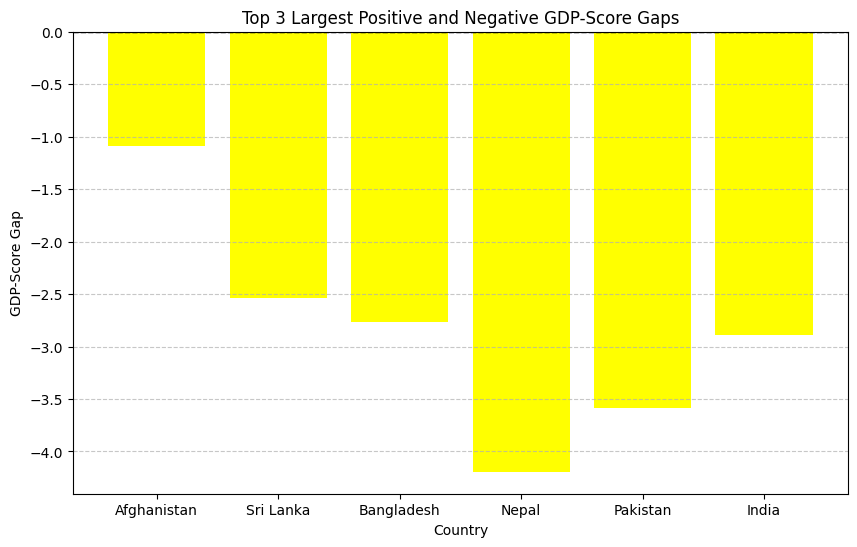

In [ ]:
#3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
import pandas as pd
import matplotlib.pyplot as plt

# Filter South Asian countries
south_asian_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]
south_asia_data = data[data['Country name'].isin(south_asian_countries)][[
    'Country name', 'score', 'Log GDP per capita'
]]

# Add 'GDP-Score Gap'
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Get top 3 positive and negative gaps
largest_positive = south_asia_data.nlargest(3, 'GDP-Score Gap')
largest_negative = south_asia_data.nsmallest(3, 'GDP-Score Gap')

# Combine results for plotting
combined_gaps = pd.concat([largest_positive, largest_negative])

# Create bar chart
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'yellow' for x in combined_gaps['GDP-Score Gap']]
plt.bar(combined_gaps['Country name'], combined_gaps['GDP-Score Gap'], color=colors)

# Customize the chart
plt.title('Top 3 Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#4. Analyze the reasons behind these gaps and their implications for South Asian countries.
#3.3 Problem - 3 - Comparative Analysis:
#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
#Tasks:
#1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
#middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
# Define the list of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
filtered_data = df[df['Country name'].isin(middle_east_countries)]
middle_east = pd.DataFrame(filtered_data)
middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [ ]:
#1. Descriptive Statistics:
#Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# Calculate mean and standard deviation for South Asia
mean_middle_east =middle_east['score'].mean()
mean_SADF = South_Asia['score'].mean()
std_dev=middle_east['score'].std()
std_SADF = South_Asia['score'].std()
print("Mean scores for the region")
print(mean_middle_east,mean_SADF)
print("Standard deviation for the region")
print(std_dev,std_SADF)

#Which region has higher happiness Scores on average?
# Compare the mean scores of both regions
if(mean_middle_east>mean_SADF):
    print("middle east has the high happiness score")
else:
    print("South East has the high happiness score")


Mean scores for the region
5.412100000000001 3.8952000000000004
Standard deviation for the region
1.5662011684327144 1.3160025455902433
middle east has the high happiness score


========================For Middle East Countries=========================
4                   Israel
12                  Kuwait
21    United Arab Emirates
Name: Country name, dtype: object
124     Jordan
132      Yemen
141    Lebanon
Name: Country name, dtype: object
========================for South Asian countries============================
0       Nepal
1    Pakistan
2       India
Name: Country name, dtype: object
2          India
3     Bangladesh
4    Afghanistan
Name: Country name, dtype: object


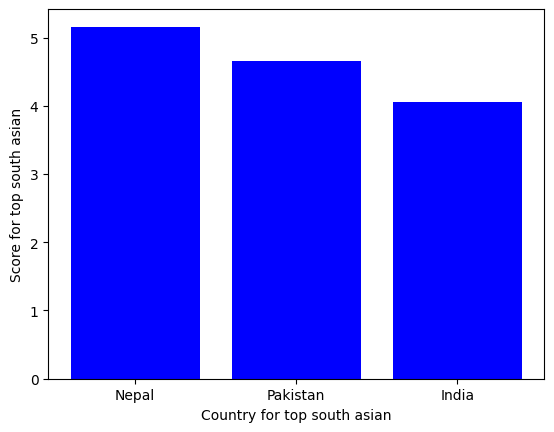

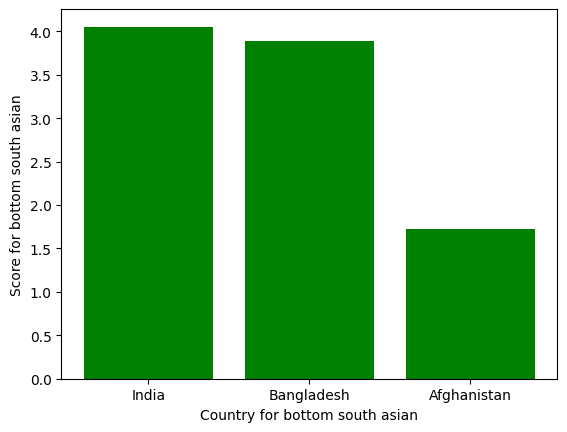

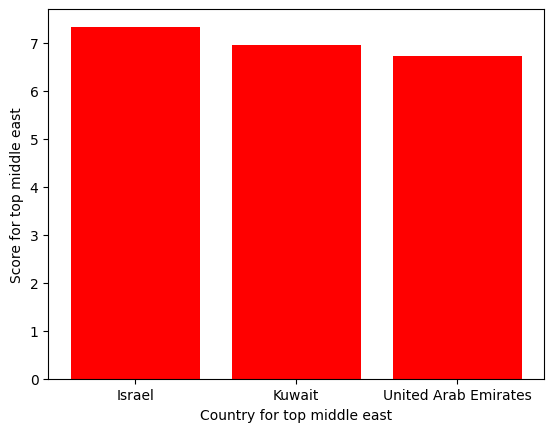

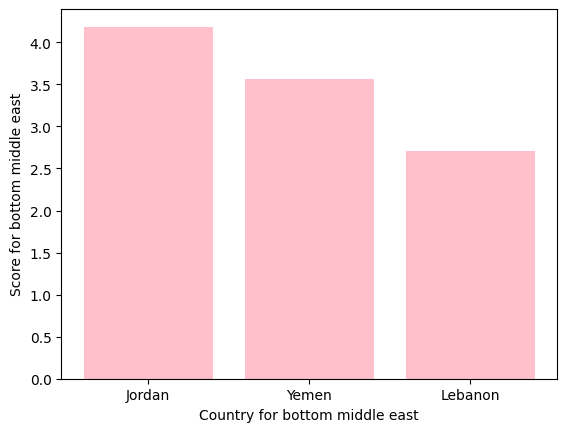

In [ ]:
#2. Top and Bottom Performers:
# Identify the top 3 and bottom 3 countries in each region based on the score.
# Top 3 and bottom 3 countries in South Asia based on score
middle_east_top_3 = middle_east.sort_values(by='score', ascending=False)
SADF_top_3=South_Asia.sort_values(by = 'score',ascending=False)

# Display the results
print("========================For Middle East Countries=========================")
print(middle_east_top_3['Country name'].head(3))
print(middle_east_top_3['Country name'].tail(3))
print("========================for South Asian countries============================")
print(SADF_top_3['Country name'].head(3))
print(SADF_top_3['Country name'].tail(3))

# Plot top 3 South Asian countries
x= SADF_top_3['Country name'].head(3)
y= SADF_top_3['score'].head(3)
plt.bar(x,y,color='blue')
plt.xlabel("Country for top south asian")
plt.ylabel("Score for top south asian")
plt.show()

# Plot bottom 3 South Asian countries
x= SADF_top_3['Country name'].tail(3)
y= SADF_top_3['score'].tail(3)
plt.bar(x,y,color='green')
plt.xlabel("Country for bottom south asian")
plt.ylabel("Score for bottom south asian")
plt.show()

# Plot top 3 Middle East countries
x= middle_east_top_3['Country name'].head(3)
y= middle_east_top_3['score'].head(3)
plt.bar(x,y,color='red')
plt.xlabel("Country for top middle east")
plt.ylabel("Score for top middle east")
plt.show()

# Plot bottom 3 Middle East countries
x= middle_east_top_3['Country name'].tail(3)
y= middle_east_top_3['score'].tail(3)
plt.bar(x,y,color='pink')
plt.xlabel("Country for bottom middle east")
plt.ylabel("Score for bottom middle east")
plt.show()





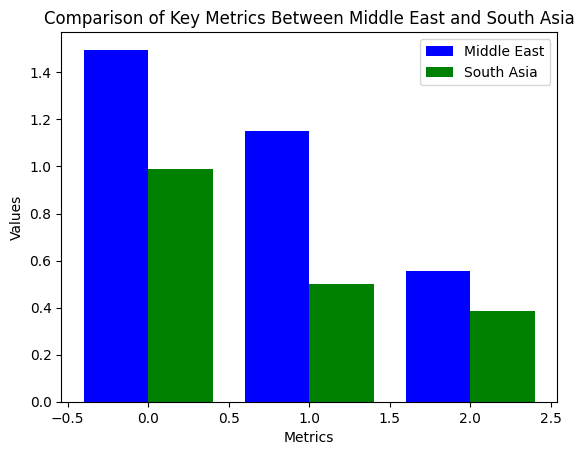

In [ ]:
#3. Metric Comparisons:
#Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
# Import libraries
import numpy as np
middle_east_GDP = middle_east['Log GDP per capita'].mean()
middle_east_social_support = middle_east['Social support'].mean()
middle_east_healthy_life_expectancy = middle_east['Healthy life expectancy'].mean()

# Calculate mean values for key metrics in South Asia
SADF_GDP =South_Asia['Log GDP per capita'].mean()
SADF_social_support = South_Asia['Social support'].mean()
SADF_health_expectancy = South_Asia['Healthy life expectancy'].mean()

# Define metrics and values for both regions
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
middle_east_values = [middle_east_GDP, middle_east_social_support, middle_east_healthy_life_expectancy]
SADF_values = [SADF_GDP, SADF_social_support, SADF_health_expectancy]
bar_width = 0.40

# Create grouped bar chart
x = np.arange(len(metrics))
plt.bar(x - bar_width/2, middle_east_values, width=bar_width, color='blue', label='Middle East')
plt.bar(x + bar_width/2, SADF_values, width=bar_width, color='green', label='South Asia')

# Add labels, title, and legend
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparison of Key Metrics Between Middle East and South Asia")

# Show the plot
plt.legend()
plt.show()

In [ ]:
#4. Happiness Disparity:
#Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
SADF_range = South_Asia['score'].max()-South_Asia['score'].min()
middle_east_range = middle_east['score'].max()-middle_east['score'].min()
SADF_CV = South_Asia['score'].std()/South_Asia['score'].mean()
middle_east_cv=middle_east['score'].std()/South_Asia['score'].mean()
print("Ranges: ",SADF_range,middle_east_range)
print("Coeffecient of variations: ",SADF_CV,middle_east_cv)

#Explanation: According to the result for the coefficient of variation in both the regions the south asian country has a variation of 0.33 and that of middle east is 0.40 so the middle east has the greater variability in happiness.

Ranges:  3.4370000000000003 4.634
Coeffecient of variations:  0.3378523684509764 0.4020849169317915


0.801497903141921 0.8773326267276358
0.8632202433827544 0.8632202433827544


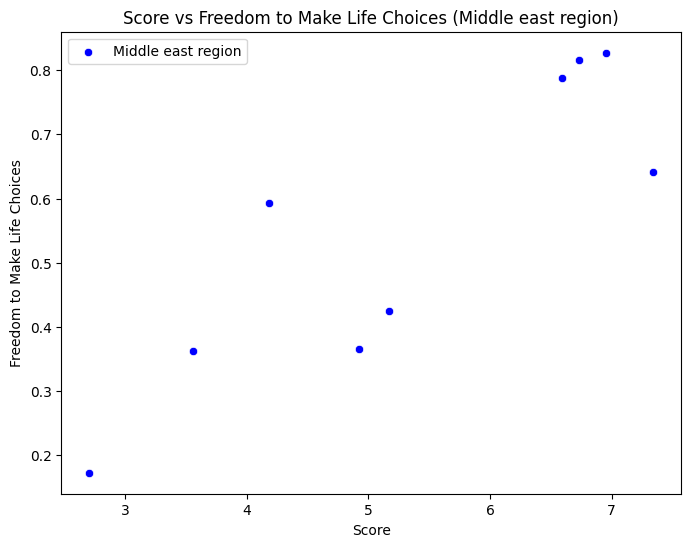

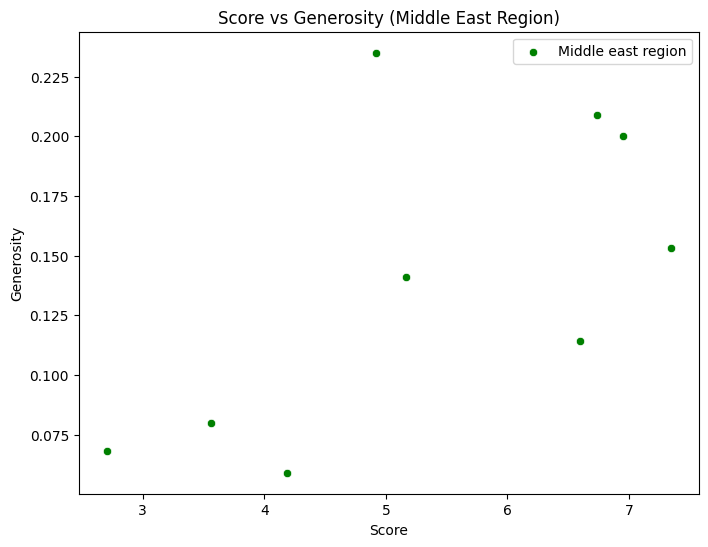

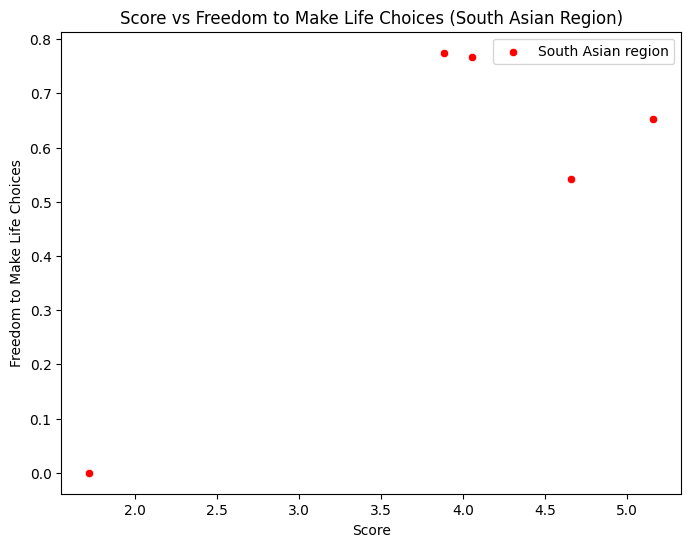

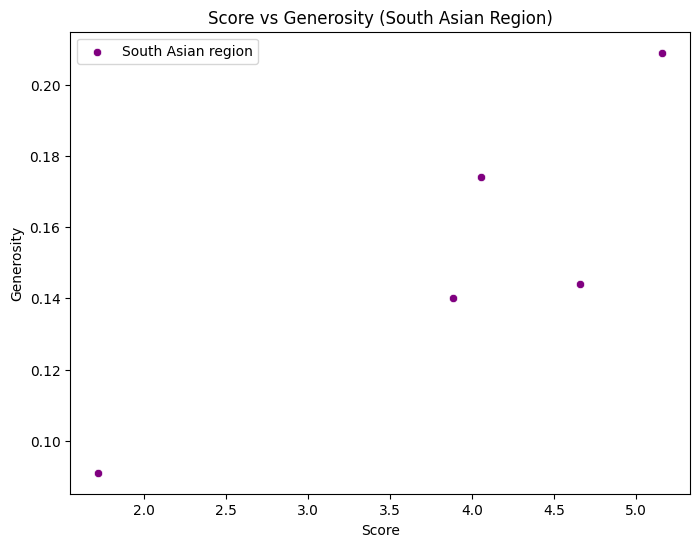

In [ ]:
#5. Correlation Analysis:
# Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
# Calculate correlations for South Asia

# Import necessary library for scatter plots
import seaborn as sns

# Extract data for Middle East
middle_east_score = middle_east['score']
middle_east_freedom =middle_east['Freedom to make life choices']
middle_east_generosity = middle_east['Generosity']

# Extract data for South Asia
SADF_score =South_Asia['score']
SADF_freedom =South_Asia['Freedom to make life choices']
SADF_generosity=South_Asia['Generosity']

# Calculate Pearson correlations for South Asia
corr_Sadf = SADF_score.corr(SADF_freedom,method='pearson')
corr_generosity=SADF_score.corr(SADF_generosity,method='pearson')
print(corr_Sadf,corr_generosity)

# Calculate Pearson correlations for Middle East
corr_middle_east = middle_east_score.corr(middle_east_freedom,method='pearson')
corr_middle_east_generosity = middle_east_score.corr(middle_east_generosity,method='pearson')
print(corr_middle_east,corr_middle_east)

# Scatter plot for Score vs Freedom (Middle East)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=middle_east, x=middle_east_score, y=middle_east_freedom, color='blue', label='Middle east region')
plt.title('Score vs Freedom to Make Life Choices (Middle east region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()

# Scatter plot for Score vs Generosity (Middle East)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=middle_east, x=middle_east_score, y=middle_east_generosity, color='green', label='Middle east region')
plt.title('Score vs Generosity (Middle East Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()

# Scatter plot for Score vs Freedom (South Asia)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=South_Asia, x=SADF_score, y=SADF_freedom, color='red', label='South Asian region')
plt.title('Score vs Freedom to Make Life Choices (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Freedom to Make Life Choices')
plt.legend()
plt.show()

# Scatter plot for Score vs Generosity (South Asia)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=South_Asia, x=SADF_score, y=SADF_generosity, color='purple', label='South Asian region')
plt.title('Score vs Generosity (South Asian Region)')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.legend()
plt.show()


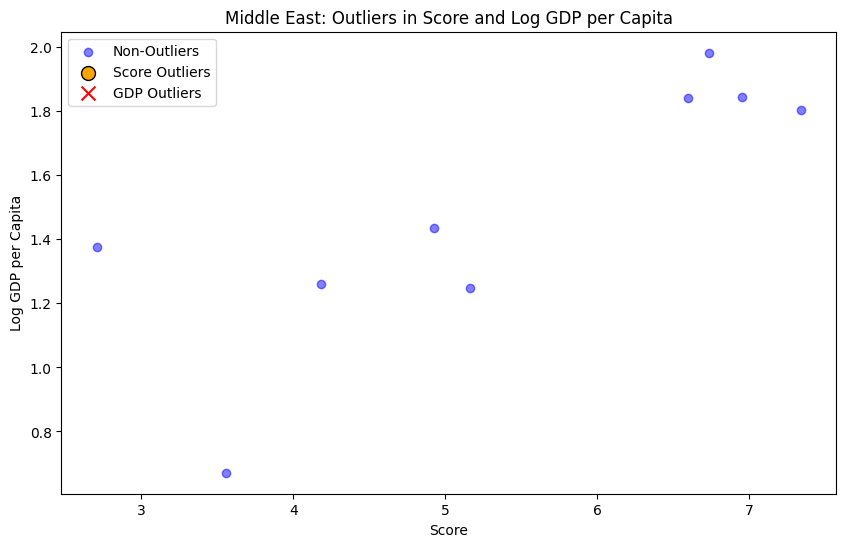

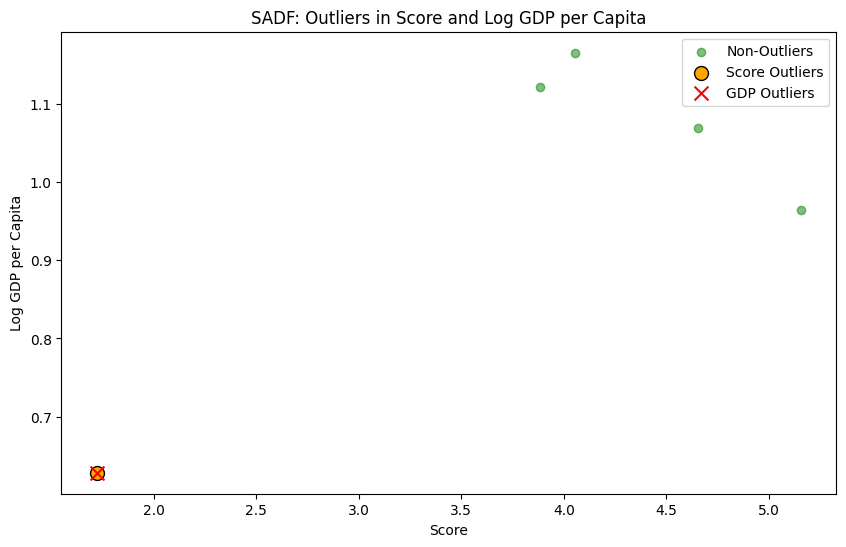

In [ ]:
#6. Outlier Detection:
#Identify outlier countries in both regions based on Score and GDP per Capita.

# Define a function to identify outliers using the 1.5 x IQR rulemiddle_east_score = middle_east['score']
middle_east_gdp =middle_east['Log GDP per capita']
SADF_score =South_Asia['score']
SADF_gdp =South_Asia['Log GDP per capita']
def outliers(col_name):
    Q1 = col_name.quantile(0.25)
    Q3 = col_name.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col_name < lower_bound) | (col_name > upper_bound)

# Extract data for Middle East and South Asia
middle_east_outliers_scr =outliers(middle_east_score)
middle_east_outliers_gdp =outliers(middle_east_gdp)
SADF_outliers_scr = outliers(SADF_score)
SADF_outliers_gdp = outliers(SADF_gdp)

# Scatter plot for Middle East outliers
plt.figure(figsize=(10, 6))
plt.scatter(middle_east['score'], middle_east['Log GDP per capita'], label='Non-Outliers', c='blue', alpha=0.5)
plt.scatter(middle_east[middle_east_outliers_scr]['score'],
            middle_east[middle_east_outliers_scr]['Log GDP per capita'],
            c='orange', label='Score Outliers', marker='o', edgecolors='black', s=100)
plt.scatter(middle_east[middle_east_outliers_gdp]['score'],
            middle_east[middle_east_outliers_gdp]['Log GDP per capita'],
            c='red', label='GDP Outliers', marker='x', s=100)
plt.title("Middle East: Outliers in Score and Log GDP per Capita")
plt.xlabel("Score")
plt.ylabel("Log GDP per Capita")
plt.legend()
plt.show()

# Scatter plot for South Asia outlier
plt.figure(figsize=(10, 6))
plt.scatter(South_Asia['score'], South_Asia['Log GDP per capita'], label='Non-Outliers', c='green', alpha=0.5)
plt.scatter(South_Asia[SADF_outliers_scr]['score'],
           South_Asia[SADF_outliers_scr]['Log GDP per capita'],
            c='orange', label='Score Outliers', marker='o', edgecolors='black', s=100)
plt.scatter(South_Asia[SADF_outliers_gdp]['score'],
            South_Asia[SADF_outliers_gdp]['Log GDP per capita'],
            c='red', label='GDP Outliers', marker='x', s=100)
plt.title("SADF: Outliers in Score and Log GDP per Capita")
plt.xlabel("Score")
plt.ylabel("Log GDP per Capita")
plt.legend()
plt.show()
# These outlier are the extreme values that are present in the columns .These outliers have some effects on the mean but a less effect on the  median and the mode.

<ipython-input-42-2da3853cea30>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Region', y='score', palette=['skyblue', 'salmon'])


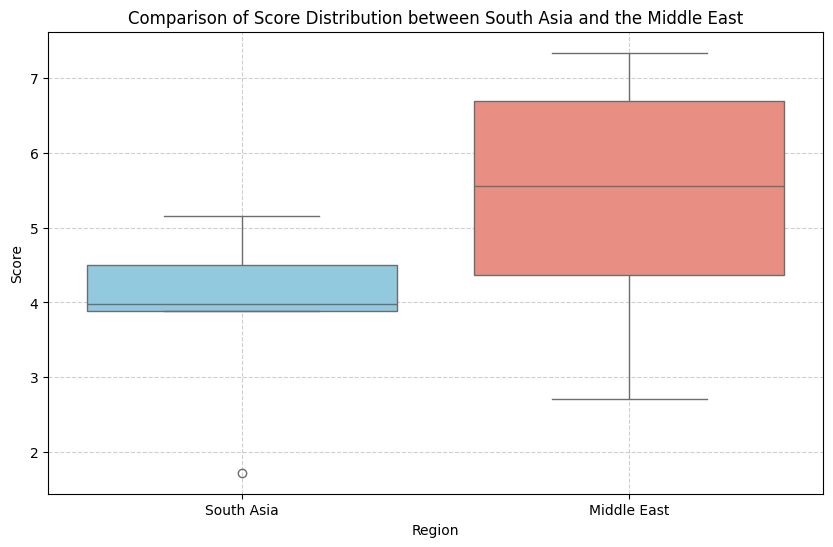

In [ ]:
#7. Visualization:
#Create boxplots comparing the distribution of Score between South Asia and the Middle East.
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data for plotting
combined_data = pd.concat([
    south_asia_data[['Country name', 'score']].assign(Region='South Asia'),
    middle_east[['Country name', 'score']].assign(Region='Middle East')
])

# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Region', y='score', palette=['skyblue', 'salmon'])

# Customize the plot
plt.title("Comparison of Score Distribution between South Asia and the Middle East")
plt.xlabel("Region")
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




In [ ]:
#Interpret the key differences in distribution shapes, medians, and outliers.
#Distribution Shapes:

#Symmetric: Mean = Median.
#Right-skewed: Mean > Median.
#Left-skewed: Mean < Median.
#Uniform: All values are equally likely.
#Bimodal/Multimodal: Multiple peaks indicate subgroups.
#Medians: The middle value in ordered data, less sensitive to outliers. It reflects central tendency better in skewed data.
#Outliers: Extreme values that distort the mean but have minimal impact on the median. Outliers can be identified using the IQR method.